In [ ]:
#sigmoid or logit function


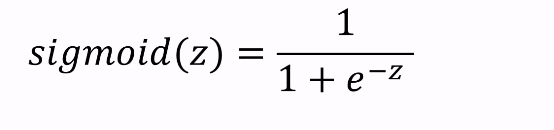

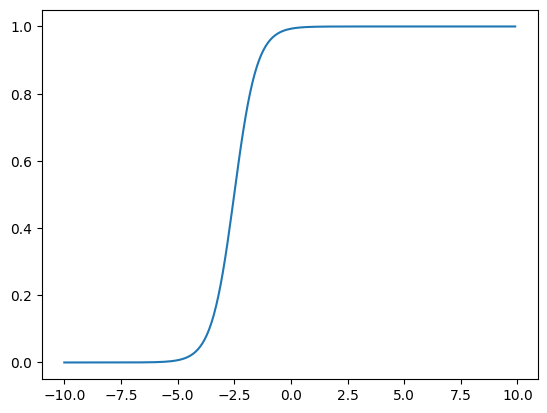

In [5]:
import matplotlib.pyplot as plt
import numpy as np
m=2
c=5
x=np.arange(-10,10,0.1)
y=[(1/(1+2.71828**(-1*(m*i+c)))) for i in x]
plt.plot(x,y)


In [7]:
import pandas as pd
df=pd.read_csv("./data/insurance.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [11]:
#logisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)
model=LogisticRegression()
model.fit(x_train,y_train)
model.predict(x_test)
print(classification_report(y_test,model.predict(x_test)))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



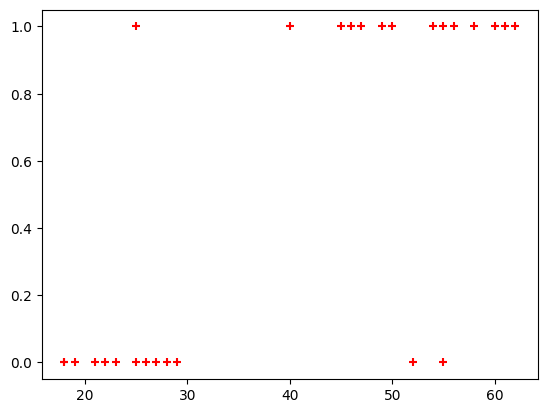

In [12]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

- Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing impact of employee salaries on retention
- Plot bar charts showing corelation between department and employee retention
- Now build logistic regression model using variables that were narrowed down in step 1
- Measure the accuracy of the model

In [17]:
df=pd.read_csv("./data/hr.csv")
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [22]:
left=df[df.left==1]
retained=df[df.left==0]
left.shape,retained.shape

((3571, 10), (11428, 10))

In [24]:
df.groupby('left')

<Axes: xlabel='salary'>

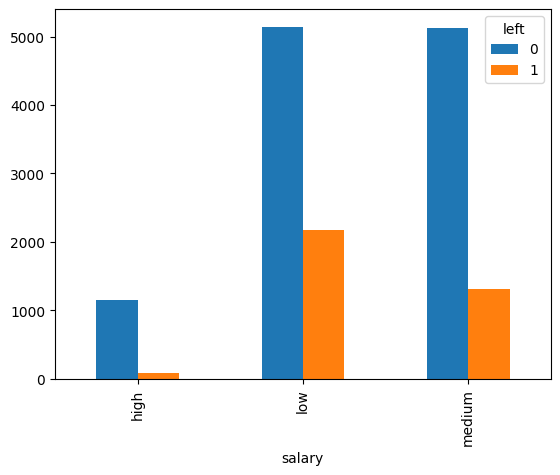

In [25]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

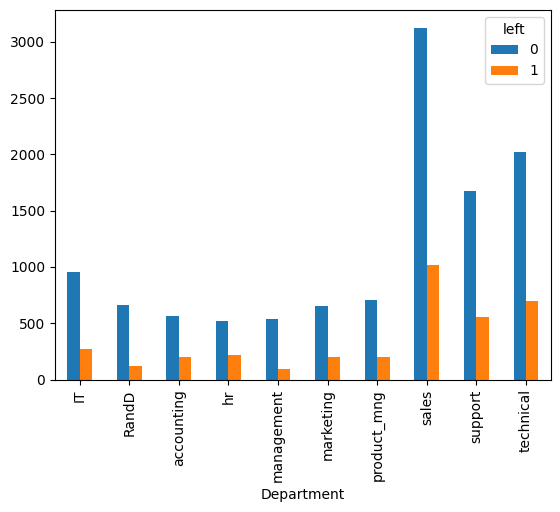

In [27]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [28]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [31]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [32]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [33]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [34]:
y = df.left

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test,y_test)

/home/mahima/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7821904761904762